In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl
import sklearn.datasets as ds
%matplotlib inline

# The training data

We will be using the sklearn's `make_moon` function.  The data is NOT linearly separable, so we cannot expect that a single perceptron can do the job.

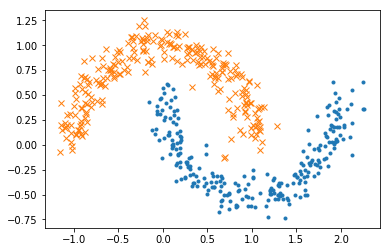

In [3]:
(x, y) = ds.make_moons(500, noise=0.1)
YES = y > 0
NO = np.logical_not(YES)
pl.plot(x[YES,0], x[YES,1], '.', x[NO, 0], x[NO, 1], 'x');

# Linear Classifier

Let's try a linear classifier.  It won't work very well because of the non-linearity of the data.

In [25]:
class N():
    pass
model = N()
model.x = tf.placeholder(tf.float32, (None, 2))
model.ref = tf.placeholder(tf.float32, (None, 1))
model.l1 = tf.layers.dense(inputs=model.x, units=1)
model.linear_logits = model.l1
model.linear_output = tf.nn.sigmoid(model.linear_logits)
model.linear_cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=model.ref, logits=model.linear_logits))

## Training the linear output

In [26]:
s = tf.Session()
s.run(tf.global_variables_initializer())
feed = {model.x: x, model.ref: y.reshape(-1, 1)}
linear_optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(model.linear_cost)
epochs = 10000
for i in range(epochs):
    cost, _ = s.run([model.linear_cost, linear_optimizer], feed)
    if i % (epochs // 10) == 0:
        print "[%d] %.2f" % (i, cost)
print "Done"

[0] 0.51
[1000] 0.37
[2000] 0.33
[3000] 0.31
[4000] 0.30
[5000] 0.29
[6000] 0.28
[7000] 0.28
[8000] 0.27
[9000] 0.27
Done


## Plotting the classification boundary

- We generate meshgrids using the `np.meshgrid` function.  This will
give us KxK matrices with the x and y coordinates, as required by
`contourf` plotting function.

- However, tensorflow model requires us to feed K*K x 2 tensor,
so, we will be reshaping xx and yy to make the required tensor.

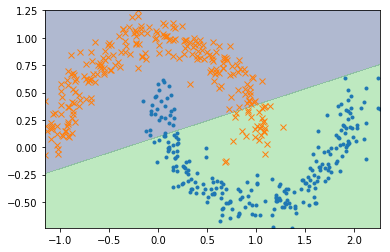

In [27]:
K = 50
xmin, xmax = np.min(x[:, 0]), np.max(x[:, 0])
ymin, ymax = np.min(x[:, 1]), np.max(x[:, 1])
xx, yy = np.meshgrid(np.linspace(xmin, xmax, K), np.linspace(ymin, ymax, K))
input = np.asarray([xx.reshape(-1), yy.reshape(-1)]).T
z = s.run(model.linear_output, {model.x: input})
pl.contourf(xx, yy, z.reshape(K, K), levels=[0, 0.5, 1], alpha=0.4);
pl.plot(x[YES,0], x[YES,1], '.', x[NO, 0], x[NO, 1], 'x');

# Multi-linear perceptron with non-linear activation

In [51]:
tf.reset_default_graph()
n1 = 10
n2 = 10
model = N()
model.x = tf.placeholder(tf.float32, (None, 2))
model.ref = tf.placeholder(tf.float32, (None, 1))
model.l1 = tf.layers.dense(inputs=model.x, units=n1, activation=tf.nn.relu)
model.l2 = tf.layers.dense(inputs=model.l1, units=n2, activation=tf.nn.relu)
model.y = tf.layers.dense(inputs=model.l2, units=1)
model.err = tf.nn.sigmoid_cross_entropy_with_logits(labels=model.ref, logits=model.y)
model.cost = tf.reduce_mean(model.err)

In [52]:
batch_size = 100
rate = 0.01

def batch():
    I = np.random.choice(len(x), batch_size)
    x_sample = x[I,:]
    y_sample = y[I]
    return {model.x: x_sample, model.ref: y_sample.reshape((-1, 1))}

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(model.cost)
s = tf.Session()
s.run(tf.global_variables_initializer())
s.run(model.cost, feed_dict=batch())


0.69905108

In [62]:
epochs = 1000
for i in range(10):
  feed = batch()
  for ep in range(epochs):
    cost, _ = s.run([model.cost, optimizer], feed)
    if ep % (epochs // 10) == 0:
        print "[%d]: %.4f" % (ep, cost)
  print "Done: %.4f" % cost

[0]: 0.1195
[100]: 0.1118
[200]: 0.1096
[300]: 0.1075
[400]: 0.1055
[500]: 0.1037
[600]: 0.1020
[700]: 0.1004
[800]: 0.0988
[900]: 0.0972
Done: 0.0956
[0]: 0.1809
[100]: 0.1724
[200]: 0.1665
[300]: 0.1608
[400]: 0.1551
[500]: 0.1493
[600]: 0.1435
[700]: 0.1376
[800]: 0.1316
[900]: 0.1257
Done: 0.1199
[0]: 0.1420
[100]: 0.1153
[200]: 0.1072
[300]: 0.1025
[400]: 0.0988
[500]: 0.0954
[600]: 0.0921
[700]: 0.0889
[800]: 0.0859
[900]: 0.0830
Done: 0.0803
[0]: 0.1072
[100]: 0.0775
[200]: 0.0714
[300]: 0.0674
[400]: 0.0641
[500]: 0.0611
[600]: 0.0583
[700]: 0.0557
[800]: 0.0534
[900]: 0.0512
Done: 0.0491
[0]: 0.0563
[100]: 0.0437
[200]: 0.0414
[300]: 0.0394
[400]: 0.0376
[500]: 0.0361
[600]: 0.0346
[700]: 0.0333
[800]: 0.0321
[900]: 0.0309
Done: 0.0298
[0]: 0.0481
[100]: 0.0432
[200]: 0.0408
[300]: 0.0389
[400]: 0.0372
[500]: 0.0357
[600]: 0.0341
[700]: 0.0327
[800]: 0.0315
[900]: 0.0305
Done: 0.0295
[0]: 0.0858
[100]: 0.0535
[200]: 0.0483
[300]: 0.0447
[400]: 0.0421
[500]: 0.0404
[600]: 0.039

## Plot the contour again

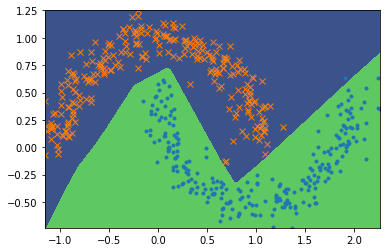

In [63]:
grid_n = 100
xs = np.linspace(np.min(x[:,0]), np.max(x[:,0]), grid_n)
ys = np.linspace(np.min(x[:,1]), np.max(x[:,1]), grid_n)
xx, yy = np.meshgrid(xs, ys)
x0 = xx.reshape(-1)
x1 = yy.reshape(-1)
xinput = np.asarray([x0, x1]).T
output = s.run(tf.sigmoid(model.y), {model.x: xinput})
z = output.reshape((grid_n, grid_n))

pl.contourf(xx, yy, z, levels=[0, 0.5, 1]);
pl.plot(x[YES, 0], x[YES, 1] ,'.', x[NO, 0], x[NO, 1], 'x');